In [21]:
import pandas as pd
from pandas_datareader import data as pdr
from datetime import datetime

In [22]:
import yfinance as yf
yf.pdr_override()

In [23]:
df_tesla = pdr.get_data_yahoo(['TSLA']) 

[*********************100%%**********************]  1 of 1 completed


In [25]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


<Axes: xlabel='Date'>

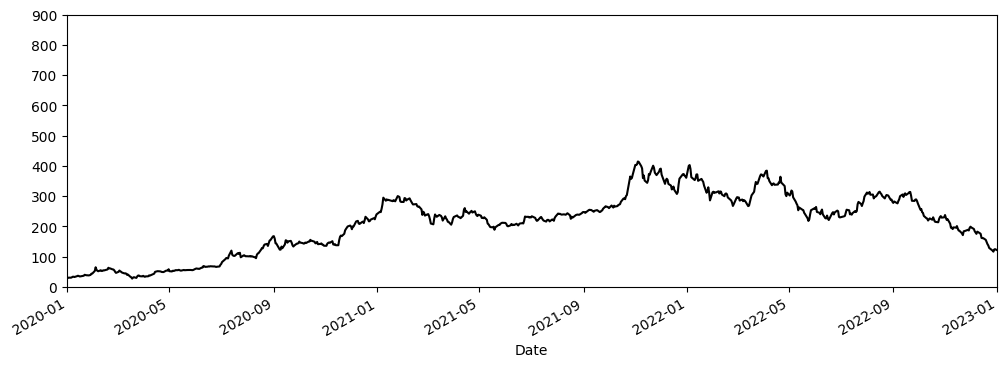

In [41]:
df_tesla['High'].plot(figsize=(12,4),xlim=['2020-01-01','2023'],ylim=[0,900],c='black')

In [42]:
df_tesla.index

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-28',
               '2023-08-29', '2023-08-30', '2023-08-31', '2023-09-01',
               '2023-09-05', '2023-09-06'],
              dtype='datetime64[ns]', name='Date', length=3320, freq=None)

In [43]:
df_tesla.loc['2012-01-01':'2020-01-01']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,1.929333,1.966667,1.843333,1.872000,1.872000,13921500
2012-01-04,1.880667,1.911333,1.833333,1.847333,1.847333,9451500
2012-01-05,1.850667,1.862000,1.790000,1.808000,1.808000,15082500
2012-01-06,1.813333,1.852667,1.760667,1.794000,1.794000,14794500
2012-01-09,1.800000,1.832667,1.741333,1.816667,1.816667,13455000
...,...,...,...,...,...,...
2019-12-24,27.890667,28.364668,27.512667,28.350000,28.350000,120820500
2019-12-26,28.527332,28.898666,28.423332,28.729334,28.729334,159508500
2019-12-27,29.000000,29.020666,28.407333,28.691999,28.691999,149185500


In [46]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
share_open = df_tesla.loc['2010-01-01':'2024-01-01']['Open']
index=share_open.index

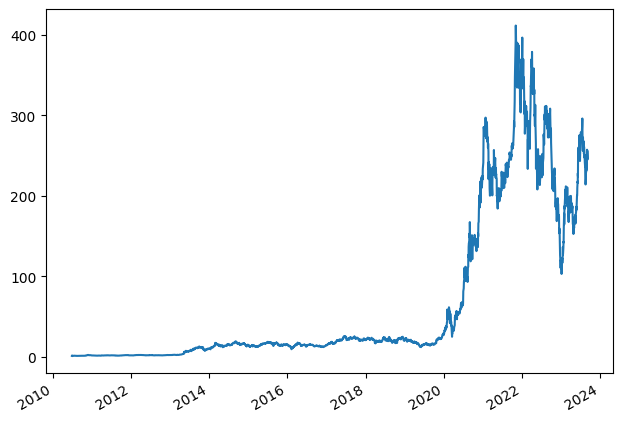

In [65]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index,share_open)

In [67]:
#datetime index
df_tesla = df_tesla.reset_index()
df_tesla.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [68]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3320 entries, 0 to 3319
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      3320 non-null   int64         
 1   Date       3320 non-null   datetime64[ns]
 2   Open       3320 non-null   float64       
 3   High       3320 non-null   float64       
 4   Low        3320 non-null   float64       
 5   Close      3320 non-null   float64       
 6   Adj Close  3320 non-null   float64       
 7   Volume     3320 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 207.6 KB


In [69]:
df_tesla=df_tesla.set_index("Date")
df_tesla.head()

,index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [70]:
date = datetime(2021,12,1)

Time resampling

In [73]:
df_tesla.head()

,index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-06-29,0,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,2,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,3,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,4,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [75]:
#it will return minimum value of each column for every year
df_tesla.resample(rule='A').min()

,index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
2010-12-31,0,1.076000,1.108667,0.998667,1.053333,1.053333,1777500
2011-12-31,130,1.452000,1.484667,1.407333,1.455333,1.455333,3594000
2012-12-31,382,1.774667,1.790000,1.509333,1.519333,1.519333,5473500
2013-12-31,632,2.205333,2.225333,2.140667,2.194000,2.194000,6603000
2014-12-31,884,9.366667,9.800000,9.111333,9.289333,9.289333,19983000
2015-12-31,1136,12.388667,12.619333,12.093333,12.333333,12.333333,10620000
2016-12-31,1388,9.488000,10.331333,9.403333,9.578000,9.578000,24892500
2017-12-31,1640,14.316667,14.688667,14.064000,14.466000,14.466000,32800500
2018-12-31,1891,16.851999,17.355333,16.306000,16.704000,16.704000,46210500


<Axes: xlabel='Date'>

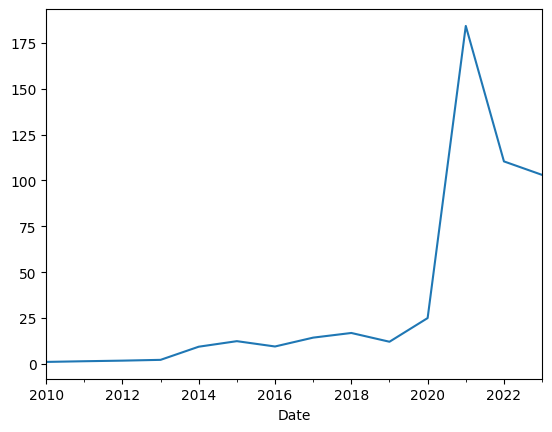

In [79]:
df_tesla.resample(rule='A').min()['Open'].plot()

Rolling

In [80]:
df_tesla["High"].rolling(10).mean()

Date
2010-06-29           NaN
2010-06-30           NaN
2010-07-01           NaN
2010-07-02           NaN
2010-07-06           NaN
                 ...    
2023-08-30    239.654004
2023-08-31    243.098003
2023-09-01    247.248001
2023-09-05    249.835001
2023-09-06    251.292000
Name: High, Length: 3320, dtype: float64